<a href="https://colab.research.google.com/github/adelino-dev/Katie-CienciaDeDados/blob/main/projeto-final/katie-projeto-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando Bibliotecas:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

#Carregando dataset:
df_cursos = pd.read_csv('https://media.githubusercontent.com/media/adelino-dev/Katie-CienciaDeDados/main/projeto-final/dataset/CADASTRO_CURSOS_2020.CSV', 
                        encoding='ISO-8859-1', 
                        sep=';', 
                        low_memory=False)

In [ ]:
# Renomeando Colunas:
df_cursos.rename(columns = {'QT_ING_60_MAIS':'ING_60_MAIS',
                            'QT_MAT_FEM': 'MAT_FEM',
                            'QT_MAT_MASC': 'MAT_MASC',
                            },
                 inplace = True)

# Definindo Funções

def get_tag(categoria):
  """
  Retorna a tag da categoria.
  ----------------------------
  categorias: 
    - 'ingressantes';
    - 'matriculados';
    - 'concluintes'; 
  """

  abr = {'ingressantes':'ING', 'matriculados':'MAT', 'concluintes':'CONC'}
  return abr[categoria]

def get_qntAlunos(categoria):
  """
  Retorna um dicionário contendo a quantidade de alunos por idade, 
  raça/cor e sexo de acordo com a categoria.

  Valores aceitos para o parâmetro "categoria":
      - 'ingressantes';
      - 'matriculados';
      - 'concluintes';
  """
  tag = get_tag(categoria)

  dados = {
    "idade":{
        
        'Adolescentes (0 a 17 anos)': sum(df_cursos[tag+'_0_17']),

        'Jovens (18 a 29 anos)':  sum([
            sum(df_cursos[tag+'_18_24']), 
            sum(df_cursos[tag+'_25_29'])
            ]),
             
        'Adultos (30 a 59 anos)': sum([
            sum(df_cursos[tag+'_30_34']),
            sum(df_cursos[tag+'_35_39']), 
            sum(df_cursos[tag+'_40_49']), 
            sum(df_cursos[tag+'_50_59'])
            ]),
             
        'Idosos (60 ou mais)': sum(df_cursos[tag+'_60_MAIS'])
    },

    "cor":{
        'Brancos': sum(df_cursos[tag+'_BRANCA']),
        'Pretos': sum(df_cursos[tag+'_PRETA']),
        'Pardos': sum(df_cursos[tag+'_PARDA']),
        'Amarelos': sum(df_cursos[tag+'_AMARELA']),
        'Indígenas': sum(df_cursos[tag+'_INDIGENA']),
        'Não declarados': sum(df_cursos[tag+'_CORND'])
        
    },

    "sexo":{
        'Mulheres': sum(df_cursos[tag+'_FEM']),
        'Homens': sum(df_cursos[tag+'_MASC'])
    }
  }

  return dados


def show_qntAlunos(categoria):
  """
  Retorna 3 gráficos:
    - Quantidade de alunos por Idade
    - Quantidade de alunos por Raça/Cor
    - Quantidade de alunos por Sexo 
  ------------------
  
  Valores aceitos para o parâmetro "categoria":
      - 'ingressantes';
      - 'matriculados';
      - 'concluintes';
  """
  tag = get_tag(categoria)
  dados = get_qntAlunos(categoria)

  # Criando gráficos
  fig, axes = plt.subplots(1,3, figsize=(30,8)) 

  ## Inserindo dados nos gráficos:
  axes[0].pie(dados['idade'].values(), labels=dados['idade'].keys(), autopct ='%1.1f%%')
  axes[1].pie(dados['cor'].values(), labels=dados['cor'].keys(), autopct ='%1.1f%%', colors = ['#f4d5bd', '#241a11', '#84572c','#FFBC42', '#b63d28', '#593C8F'])
  axes[2].bar(dados['sexo'].keys(), dados['sexo'].values())


  axes[0].legend(loc = "upper left", fontsize= 14)
  axes[1].legend(loc = "upper left", fontsize= 14)

  ## Inserindo títulos dos gráficos:
  axes[0].set_title("Quantidade de {} por idade".format(categoria), fontsize= 20)
  axes[1].set_title("Quantidade de {} por raça/cor".format(categoria), fontsize= 20)
  axes[2].set_title("Quantidade de {} por sexo".format(categoria), fontsize= 20)

  # Mostrar gráficos:
  fig.show()




## Quantificando os Tipos de Organização Acadêmica das IES:

In [ ]:
# Tipos de Organização Acadêmica:
key_tipo = {1:"Universidade", 
            2:"Centro Universitário", 
            3:"Faculdade", 
            4:"Instituto Federal de Educação, Ciência e Tecnologia", 
            5:"Centro Federal de Educação Tecnológica"}

# Lista com os tipos de Organização Acadêmica:
tipos = key_tipo.values()

# Lista com as quantidade de IES por tipo:
quantidades = df_cursos['TP_ORGANIZACAO_ACADEMICA'].value_counts().to_list()

#----------------------------------------------------------------------------
# Selecionando tipos de Organização Acadêmica:
universidades = df_cursos.query('TP_ORGANIZACAO_ACADEMICA == 1')
centros_univ = df_cursos.query('TP_ORGANIZACAO_ACADEMICA == 2')
faculdades = df_cursos.query('TP_ORGANIZACAO_ACADEMICA == 3')
institutos = df_cursos.query('TP_ORGANIZACAO_ACADEMICA == 4')
centros_fed = df_cursos.query('TP_ORGANIZACAO_ACADEMICA == 5')

# Lista com as quantidades de redes privadas de acordo com o tipo de Org. Acadêmica:
redes_publicas = [
                  universidades.query('TP_REDE == 1')['TP_REDE'].value_counts().to_list()[0],
                  centros_univ.query('TP_REDE == 1')['TP_REDE'].value_counts().to_list()[0],
                  faculdades.query('TP_REDE == 1')['TP_REDE'].value_counts().to_list()[0],
                  institutos.query('TP_REDE == 1')['TP_REDE'].value_counts().to_list()[0],
                  centros_fed.query('TP_REDE == 1')['TP_REDE'].value_counts().to_list()[0]
                  ]


redes_privadas = [
                  universidades.query('TP_REDE == 2')['TP_REDE'].value_counts().to_list()[0],
                  centros_univ.query('TP_REDE == 2')['TP_REDE'].value_counts().to_list()[0],
                  faculdades.query('TP_REDE == 2')['TP_REDE'].value_counts().to_list()[0],
                  0, 0
                  ]
#----------------------------------------------------------------------------
def get_qntAlunosGerais(tag):
  return {
      key_tipo[1]:sum(universidades[tag]),
      key_tipo[2]:sum(centros_univ[tag]),
      key_tipo[3]:sum(faculdades[tag]),
      key_tipo[4]:sum(institutos[tag]),
      key_tipo[5]:sum(centros_fed[tag])
  } 



#----------------------------------------------------------------------------
# Montando tabela com dados categorizados de acordo com o "Tipo de Organização Acadêmica":

df_tp_ies = pd.DataFrame({
                          "Tipo de Organização Acadêmica":tipos, 
                          "Quantidade de Unidades":quantidades,
                          "Unidades da Rede Pública":redes_publicas,
                          "Unidades da Rede Privadas":redes_privadas,
                          "Quantidade de Ingressantes":get_qntAlunosGerais('QT_ING').values(),
                          "Quantidade de Matriculados":get_qntAlunosGerais('QT_MAT').values(),
                          "Quantidade de Concluintes":get_qntAlunosGerais('QT_CONC').values(),
                          "Matriculados Homens":get_qntAlunosGerais('MAT_MASC').values(),
                          "Matriculados Mulheres":get_qntAlunosGerais('MAT_FEM').values()
                          })
df_tp_ies.head()

,Tipo de Organização Acadêmica,Quantidade de Unidades,Unidades da Rede Pública,Unidades da Rede Privadas,Quantidade de Ingressantes,Quantidade de Matriculados,Quantidade de Concluintes,Matriculados Homens,Matriculados Mulheres
0,Universidade,174112,13220,160892,2032691,4714747,672830,2010160,2704587
1,Centro Universitário,134616,164,134452,1145699,2345560,354246,950588,1394972
2,Faculdade,24900,712,24188,518108,1402948,235658,577638,825310
3,"Instituto Federal de Educação, Ciência e Tecno...",1941,1941,0,65220,201716,14684,109971,91745
4,Centro Federal de Educação Tecnológica,60,60,0,3951,15974,1337,10253,5721


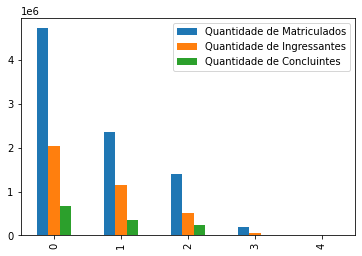

In [ ]:
# Montando Gráfico Geral:
qnt_alunos = df_tp_ies[["Tipo de Organização Acadêmica",
              "Quantidade de Matriculados",
              "Quantidade de Ingressantes", 
              "Quantidade de Concluintes"]]

qnt_alunos.plot(kind='bar');

## Ingressantes

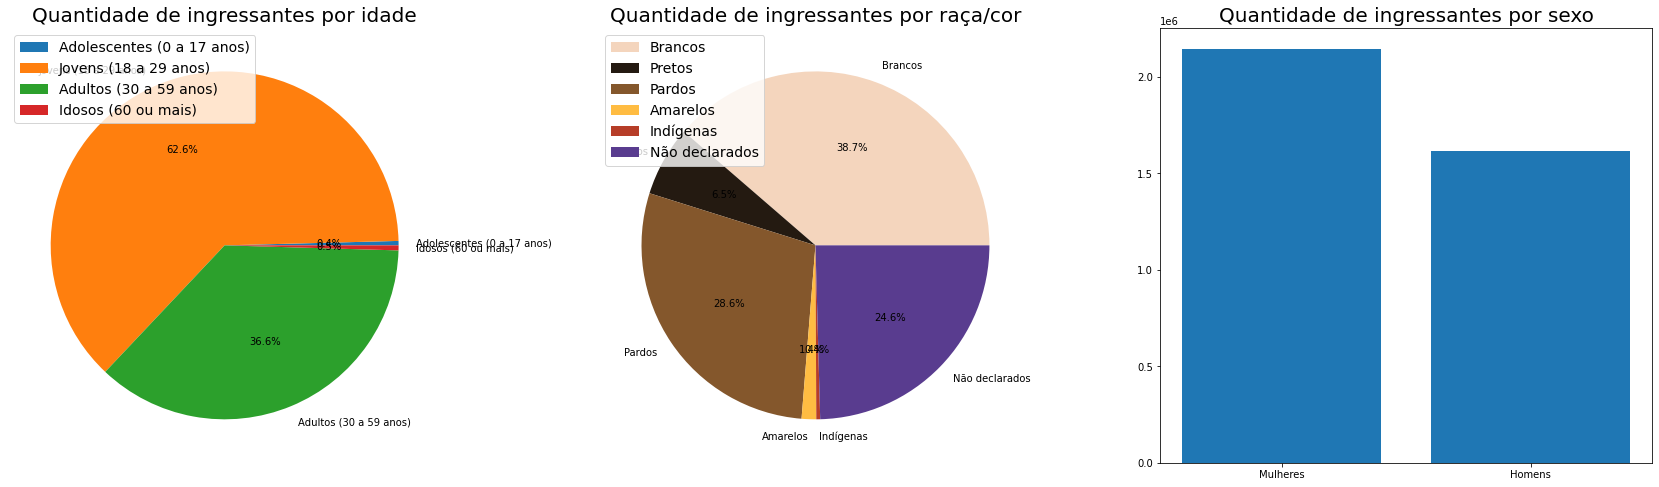

In [ ]:
# Mostrar gráficos:
show_qntAlunos('ingressantes')

## Matriculados

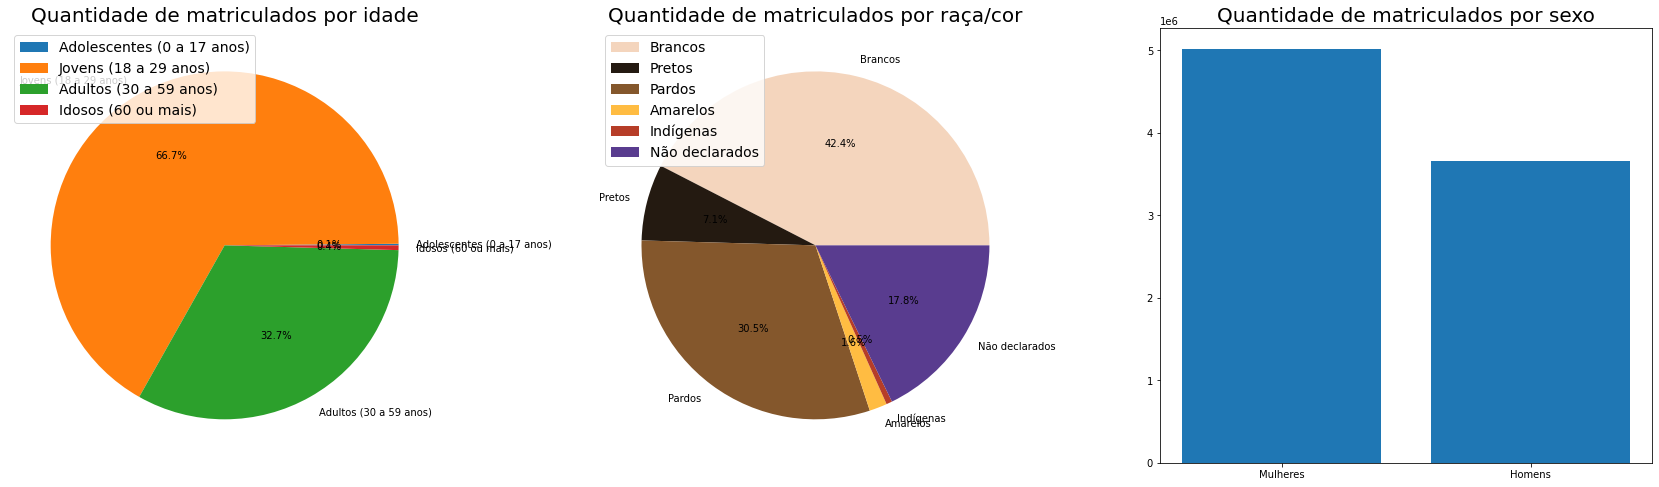

In [ ]:
# Mostrar gráficos:
show_qntAlunos('matriculados')

## Concluintes

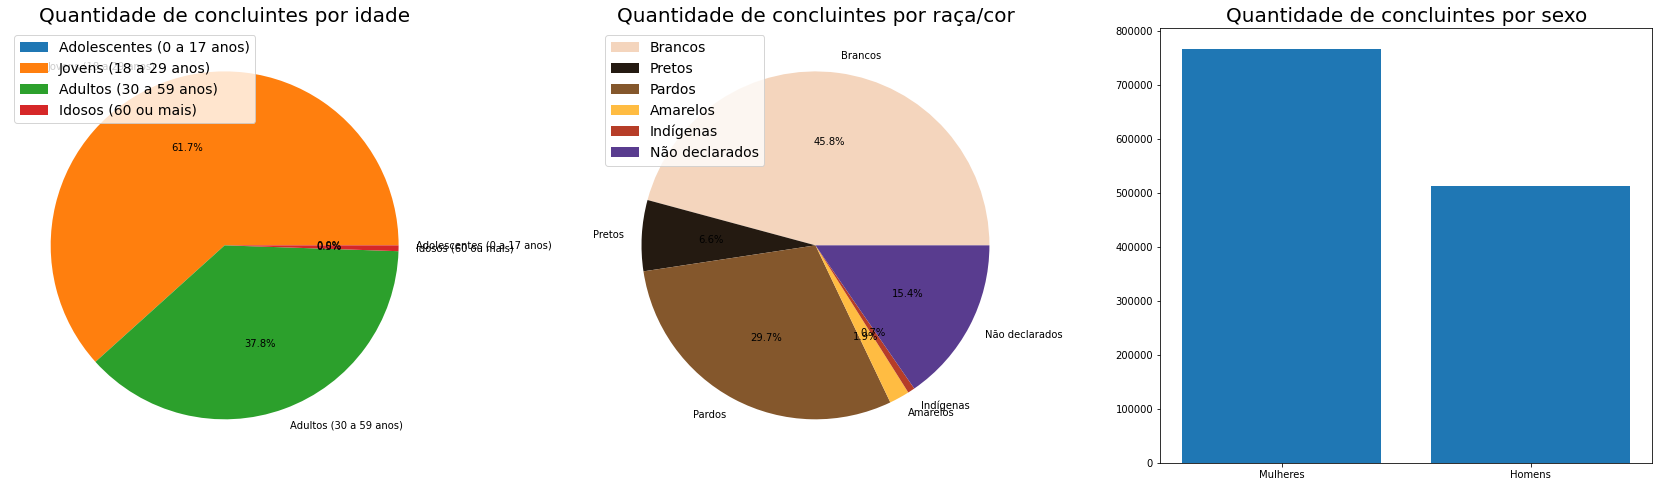

In [ ]:
# Mostrar gráficos:
show_qntAlunos('concluintes')